In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# Written by Bassem Akoush
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
#### INSTRUCTIONS FOR I/O (PLEASE READ) #######
# Input data files are available in the read-only "../input/" (relative) or '/kaggle/input'(absolute) directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
input_path = 'kaggle/input/2024-flame-ai-challenge/dataset/'
output_path = 'kaggle/working/'

In [31]:
train_df = pd.read_csv(os.path.join(input_path,'train.csv'))
train_df

,id,u,alpha,Nt,Nx,Ny,theta_filename,ustar_filename,xi_filename
0,804025,2,10,150,113,32,theta_K_id804025.dat,ustar_ms-1_id804025.dat,xi_id804025.dat
1,875935,2,5,150,113,32,theta_K_id875935.dat,ustar_ms-1_id875935.dat,xi_id875935.dat
2,930086,6,0,150,113,32,theta_K_id930086.dat,ustar_ms-1_id930086.dat,xi_id930086.dat
3,661713,4,5,150,113,32,theta_K_id661713.dat,ustar_ms-1_id661713.dat,xi_id661713.dat
4,633229,2,0,150,113,32,theta_K_id633229.dat,ustar_ms-1_id633229.dat,xi_id633229.dat
5,868570,4,0,150,113,32,theta_K_id868570.dat,ustar_ms-1_id868570.dat,xi_id868570.dat
6,16525,6,5,150,113,32,theta_K_id016525.dat,ustar_ms-1_id016525.dat,xi_id016525.dat
7,808631,6,10,150,113,32,theta_K_id808631.dat,ustar_ms-1_id808631.dat,xi_id808631.dat
8,220212,4,10,150,113,32,theta_K_id220212.dat,ustar_ms-1_id220212.dat,xi_id220212.dat


In [55]:
# load data
def load_dataX(idx):
    csv_file = train_df.reset_index().to_dict(orient='list')
    print("csv_file", csv_file)
    dir_path = os.path.join(input_path, "train")
    print("dirpath", dir_path)
    id = csv_file['id'][idx]
    print("id", id)
    nt, Nx, Ny = csv_file['Nt'][idx], csv_file['Nx'][idx], csv_file['Ny'][idx]
    print(len(np.fromfile(os.path.join(dir_path, csv_file['theta_filename'][idx]), dtype="<f4")))
    theta = np.fromfile(os.path.join(dir_path, csv_file['theta_filename'][idx]), dtype="<f4").reshape(nt, Nx, Ny)
    ustar = np.fromfile(os.path.join(dir_path, csv_file['ustar_filename'][idx]), dtype="<f4").reshape(nt, Nx, Ny)
    xi_f = np.fromfile(os.path.join(dir_path, csv_file['xi_filename'][idx]), dtype="<f4").reshape(nt, Nx, Ny)
    uin  = csv_file['u'][idx]
    alpha = csv_file['alpha'][idx]
    print(theta.shape, ustar.shape, xi_f.shape,uin,alpha)

    return theta, ustar, xi_f, uin, alpha

In [57]:
idx = 0
theta, ustar, xi_f, uin, alpha = load_dataX(idx)

csv_file {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8], 'id': [804025, 875935, 930086, 661713, 633229, 868570, 16525, 808631, 220212], 'u': [2, 2, 6, 4, 2, 4, 6, 6, 4], 'alpha': [10, 5, 0, 5, 0, 0, 5, 10, 10], 'Nt': [150, 150, 150, 150, 150, 150, 150, 150, 150], 'Nx': [113, 113, 113, 113, 113, 113, 113, 113, 113], 'Ny': [32, 32, 32, 32, 32, 32, 32, 32, 32], 'theta_filename': ['theta_K_id804025.dat', 'theta_K_id875935.dat', 'theta_K_id930086.dat', 'theta_K_id661713.dat', 'theta_K_id633229.dat', 'theta_K_id868570.dat', 'theta_K_id016525.dat', 'theta_K_id808631.dat', 'theta_K_id220212.dat'], 'ustar_filename': ['ustar_ms-1_id804025.dat', 'ustar_ms-1_id875935.dat', 'ustar_ms-1_id930086.dat', 'ustar_ms-1_id661713.dat', 'ustar_ms-1_id633229.dat', 'ustar_ms-1_id868570.dat', 'ustar_ms-1_id016525.dat', 'ustar_ms-1_id808631.dat', 'ustar_ms-1_id220212.dat'], 'xi_filename': ['xi_id804025.dat', 'xi_id875935.dat', 'xi_id930086.dat', 'xi_id661713.dat', 'xi_id633229.dat', 'xi_id868570.dat', 'xi_id016525.dat', 

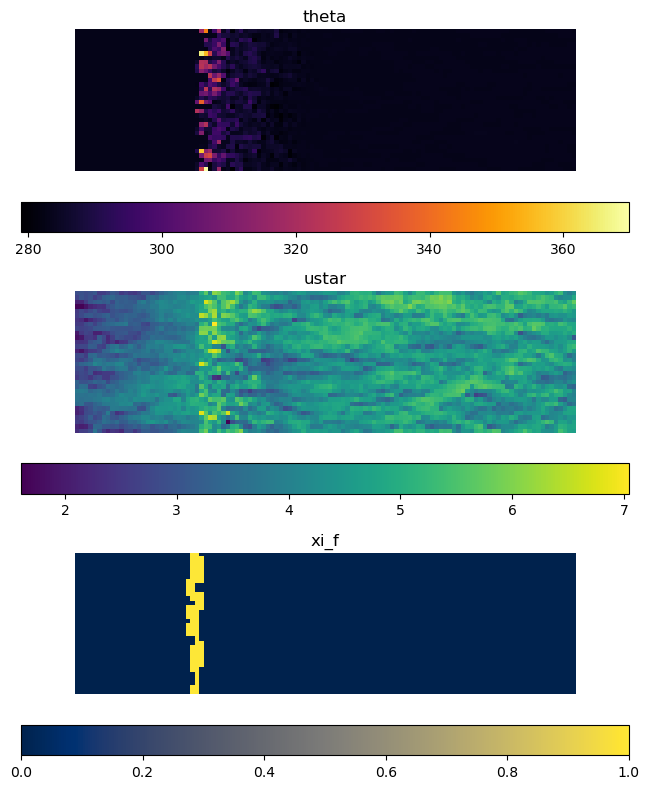

In [19]:
frame = 30
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
im0 = axs[0].imshow(theta[frame].T, cmap='inferno')
axs[0].set_title('theta')
cbar = fig.colorbar(im0, ax=axs[0], orientation='horizontal')

im1 = axs[1].imshow(ustar[frame].T, cmap='viridis')
axs[1].set_title('ustar')
cbar = fig.colorbar(im1, ax = axs[1], orientation='horizontal')

im2 = axs[2].imshow(xi_f[frame].T, vmin=0, vmax=1, cmap='cividis')
axs[2].set_title('xi_f')
cbar = fig.colorbar(im2, ax=axs[2], orientation='horizontal')
for ax in axs:
    ax.axis('off')
fig.tight_layout()